# CAMB: Code for Anisotropies in the Microwave Background

* Homepage de CAMB: https://camb.info

* Código ampliamente utilizado en cosmología desarrollado por Antony Lewis y Anthony Challinor

* Resuelve las ecuaciones de Boltzmann y estima observables dado un set de parámetros cosmológicos.

* Cuenta con un Python wrapper, está escrito en Fortran.

* Paper del código: https://iopscience.iop.org/article/10.1086/309179

*Trabajo inspirado en los tutoriales de Alejandro Cartés y de Vicente Pedreros*

## Primer paso: instalar CAMB y las librerías necesarias

In [18]:
#!pip install camb

#pip install camb

In [19]:
import camb
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad


print(f"Versión de CAMB: {camb.__version__}")

Versión de CAMB: 1.6.2


## Segundo paso: Defición de la cosmología 

En este caso vamos a elegir los que fueron definidos por Planck (https://arxiv.org/abs/1807.06209)

In [20]:
H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

In [ ]:
# Nos dice todas las funciones de este objeto

help(camb.CAMBparams)

Help on class CAMBparams in module camb.model:

class CAMBparams(camb.baseconfig.F2003Class)
 |  CAMBparams(**kwargs)
 |
 |  Object storing the parameters for a CAMB calculation, including cosmological parameters and
 |  settings for what to calculate. When a new object is instantiated, default parameters are set automatically.
 |
 |  To add a new parameter, add it to the CAMBparams type in model.f90, then  edit the _fields_ list in the CAMBparams
 |  class in model.py to add the new parameter in the corresponding location of the member list. After rebuilding the
 |  python version you can then access the parameter by using params.new_parameter_name where params is a CAMBparams
 |  instance. You could also modify the wrapper functions to set the field value less directly.
 |
 |  You can view the set of underlying parameters used by the Fortran code by printing the CAMBparams instance.
 |  In python, to set cosmology parameters it is usually best to use :meth:`set_cosmology` and
 |  equ

### Opción 1: camb.CAMBparams()

In [ ]:
# Creamos un objeto donde guardaremos los parámetros cosmológicos
pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau) # set_cosmology nos permite guardar los valores antes definidos

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [23]:
# Podemos cambiar los parámetros una vez definidos

pars.set_dark_energy(w=-1)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [ ]:
# Ahora, para obtener resultados podemos simplemente llamar a otro objeto de camb

results = camb.get_results(pars)

In [ ]:
# si buscamos los parametros aqui deberiamos encontrar los valores que definimos

results 

class: <CAMBdata>
 Params: <CAMBparams>
   WantCls = True
   WantTransfer = False
   WantScalars = True
   WantTensors = False
   WantVectors = False
   WantDerivedParameters = True
   Want_cl_2D_array = True
   Want_CMB = True
   Want_CMB_lensing = True
   DoLensing = True
   NonLinear = NonLinear_none
   Transfer: <TransferParams>
     high_precision = False
     accurate_massive_neutrinos = False
     kmax = 0.9
     k_per_logint = 0
     PK_num_redshifts = 1
     PK_redshifts = [0.0]
   want_zstar = False
   want_zdrag = False
   min_l = 2
   max_l = 2500
   max_l_tensor = 600
   max_eta_k = 6250.0
   max_eta_k_tensor = 1200.0
   ombh2 = 0.0224
   omch2 = 0.12
   omk = 0.0
   omnuh2 = 0.000644866570625114
   H0 = 67.4
   TCMB = 2.7255
   YHe = 0.24586829360147697
   num_nu_massless = 2.0293333333333337
   num_nu_massive = 1
   nu_mass_eigenstates = 1
   share_delta_neff = False
   nu_mass_degeneracies = [1.0146666666666666]
   nu_mass_fractions = [1.0]
   nu_mass_numbers = [1]
   I

### Opción 2: camb.set_params()

In [ ]:
# Usamos el objeto camb directamente

pars2 = camb.set_params(H0=67.4, w=-0.1, cs2=0.1)
results2 = camb.get_results(pars2)

In [37]:
results2

class: <CAMBdata>
 Params: <CAMBparams>
   WantCls = True
   WantTransfer = False
   WantScalars = True
   WantTensors = False
   WantVectors = False
   WantDerivedParameters = True
   Want_cl_2D_array = True
   Want_CMB = True
   Want_CMB_lensing = True
   DoLensing = True
   NonLinear = NonLinear_none
   Transfer: <TransferParams>
     high_precision = False
     accurate_massive_neutrinos = False
     kmax = 0.9
     k_per_logint = 0
     PK_num_redshifts = 1
     PK_redshifts = [0.0]
   want_zstar = False
   want_zdrag = False
   min_l = 2
   max_l = 2500
   max_l_tensor = 600
   max_eta_k = 6250.0
   max_eta_k_tensor = 1200.0
   ombh2 = 0.022
   omch2 = 0.12
   omk = 0.0
   omnuh2 = 0.000644866570625114
   H0 = 67.4
   TCMB = 2.7255
   YHe = 0.24569492503497048
   num_nu_massless = 2.0293333333333337
   num_nu_massive = 1
   nu_mass_eigenstates = 1
   share_delta_neff = False
   nu_mass_degeneracies = [1.0146666666666666]
   nu_mass_fractions = [1.0]
   nu_mass_numbers = [1]
   In

## Ejercicio 1: Calcular el parámetro de Hubble

In [27]:
# Definir cosmología

H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

# Establecemos parametros
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)
results = camb.get_results(pars)


In [28]:
# Definimos redshifts

zmax = 3000.0
Nz   = 6000
z    = np.linspace(0.0, zmax, Nz)          # z creciente → a decreciente
a    = 1.0/(1.0 + z)

In [29]:
# Calculamos parametro de Hubble

Hz   = results.hubble_parameter(z)          # km/s/Mpc

## Ejercicio 2: Calcular a(t) 

Tenemos que pasar H a 1/s, por lo que dividimos lo que sería 1 Mpc en kms.

In [ ]:
# Tenemos que pasar H a 1/s (para luego integrar)
Mpc_to_km = 3.085677581491367e19
H_si = Hz  / Mpc_to_km             # 1/s


# Reordenar por a creciente (se necesita para interpolacion)
ord_idx = np.argsort(a) # entrega indices de elementos ordenados
a_sorted  = a[ord_idx]
H_sorted  = H_si[ord_idx]

# Interpolar H con respecto a "a"
H_func = interp1d(a_sorted, H_sorted, kind='cubic', bounds_error=False, fill_value='extrapolate')

Recordemos que en la clase auxiliar llegamos a una expresión como:

$$

\int_{a_0}^a da \frac{dt}{da} = \frac{1}{H_0} \int_{a_0}^a \left[ \sum_s \Omega_{s,0} a^{-1 - 3w_s} \right]^{-1/2}

$$

Ahora calcularemos el lado izquierdo numéricamente. Escencialmente **calcularemos t a partir de los a's**

En este caso, el integrando es: $\frac{dt}{da}$, y se integra en **a**

Como 

$$
H = \frac{\dot{a}}{a} = \frac{da}{a \cdot dt} \implies \frac{dt}{da} = \frac{1}{a \cdot H}
$$

Por lo que la integrar a resolver se vuelve: 

$$

\int_{a_0}^a \frac{1}{a \cdot H} da

$$

In [31]:
# Definimos integrando
def dt_da(a_):
    return 1.0 / (a_ * H_func(a_))

# Definimos mínimo y máximo de a
a_min = a_sorted[0]      # = 1/(1+zmax)

a_max = 1.0              # hoy

# Construimos lista de a's
a_grid = np.linspace(a_min, a_max, 800)

In [32]:
# Hay que definir uns lista vacía de los t's que iremos llenando

t_grid = np.empty_like(a_grid)
t0 = 0.0

En este caso vamos a hacer la integral por tramos

$$

\int_{a_0}^a da \frac{dt}{da} = \int_{a_0}^a \frac{1}{a \cdot H} da

$$

y llegamos a una dependencia entre t y a

In [ ]:
# Integramos en tramos
for i in range(len(a_grid)):
    if i == 0:
        t_grid[i] = 0.0
    else:
        # integrar del a_grid[i-1] al a_grid[i]
        ti, err = quad(dt_da, a_grid[i-1], a_grid[i], epsabs=0, epsrel=1e-6, limit=200)
        t0 += ti
        t_grid[i] = t0 # sumamos el resultado de la integral a los t anteriores y actualizamos el valor en la lista


Como el resultado se entrega en segundos, pasamos de segundos a Gyr dividiendo por 1 Gyr en segundos

In [34]:
# Pasamos de segundos a Gyr
sec_to_Gyr = 1.0 / (3600.0*24.0*365.25*1e9)
t_Gyr = t_grid * sec_to_Gyr

Recordemos dos épocas importantes del universo:


1. **Equivalencia radiación-materia:** hace 60 kyr


2. **Equivalencia materia-DE:** hace 9 Gyr

También recordemos que en un universo dominado por:

1. **Radiación:** $a \propto t^{1/2}$

2. **Materia:** $a \propto t^{2/3}$

3. **DE:** $a \propto exp(H_o t)$

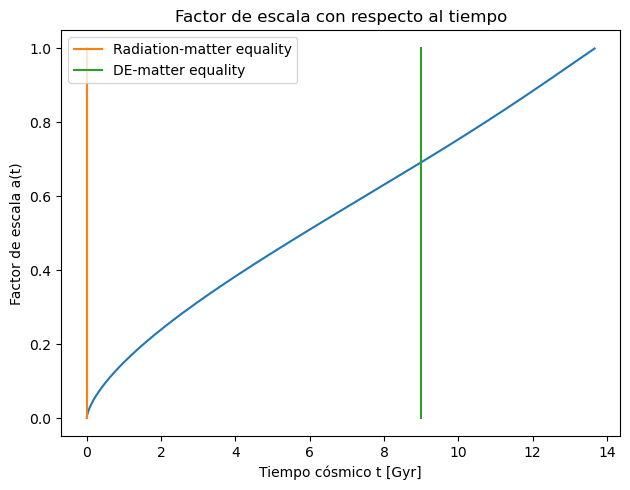

In [35]:
plt.plot(t_Gyr, a_grid)
plt.xlabel("Tiempo cósmico t [Gyr]")
plt.ylabel("Factor de escala a(t)")

x0, y0 = (60 / 10**6), 0
x1, y1 = (60 / 10**6), 1

plt.plot([x0, x1], [y0, y1], linestyle='-', label = 'Radiation-matter equality')  # recta entre (x0,y0) y (x1,y1)\

x0, y0 = 9, 0
x1, y1 = 9, 1

plt.plot([x0, x1], [y0, y1], linestyle='-', label = 'DE-matter equality')  # recta entre (x0,y0) y (x1,y1)

plt.legend(loc='upper left')
plt.tight_layout()
plt.title('Factor de escala con respecto al tiempo')
plt.show()

In [36]:
# Edad del Universo (desde a_min hasta a=1). Si zmax es lo bastante grande, esto ≈ edad total.
edad_universo_Gyr = max(t_Gyr)
print(f"Edad (aprox) del Universo: {edad_universo_Gyr:.3f} Gyr (con zmax={zmax})")

Edad (aprox) del Universo: 13.668 Gyr (con zmax=3000.0)


## Comparemos

Si el universo solo estuviera dominado por materia

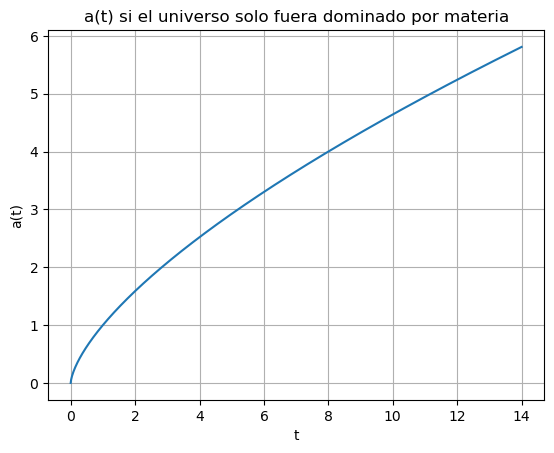

In [42]:
t = np.linspace(0, 14, 1000)

materia = t**(2/3)

plt.plot(t,  materia)
plt.xlabel('t')
plt.ylabel('a(t)')
plt.title('a(t) si el universo solo fuera dominado por materia')
plt.grid(True)
plt.show()

Si el universo solo estuviera dominado por DE